# **Bit-Per-Pixel (BPP) Image Representation in Python**

---


 code examples for each bit-per-pixel (bpp) value from 1 to 8, all working with an 8x8 pixel grid. Each example will demonstrate how the image data is stored and how to interpret it.

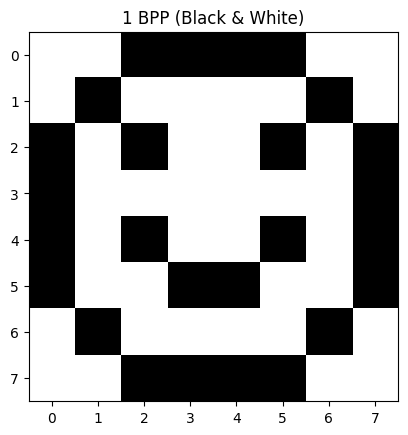

1 BPP Image Data:
Each byte represents one 8-pixel row
Bit order: Most significant bit = leftmost pixel
Total size: 8 bytes for 8x8 image


In [2]:
#1 BPP (1-bit per pixel) - Monochrome






import numpy as np
import matplotlib.pyplot as plt

# 1 BPP - Each pixel is either 0 (black) or 1 (white)
# For 8x8 image, we need 8 bytes (1 byte per row)

# Example 8x8 image data (smiley face)
image_1bpp = [
    0b00111100,  # Row 0
    0b01000010,  # Row 1
    0b10100101,  # Row 2
    0b10000001,  # Row 3
    0b10100101,  # Row 4
    0b10011001,  # Row 5
    0b01000010,  # Row 6
    0b00111100   # Row 7
]

# Convert to 8x8 numpy array
pixels = np.zeros((8, 8), dtype=np.uint8)
for y in range(8):
    for x in range(8):
        pixels[y, x] = (image_1bpp[y] >> (7 - x)) & 1

# Display
plt.imshow(pixels, cmap='binary', vmin=0, vmax=1)
plt.title("1 BPP (Black & White)")
plt.show()

# Analysis
print("1 BPP Image Data:")
print("Each byte represents one 8-pixel row")
print("Bit order: Most significant bit = leftmost pixel")
print(f"Total size: {len(image_1bpp)} bytes for 8x8 image")






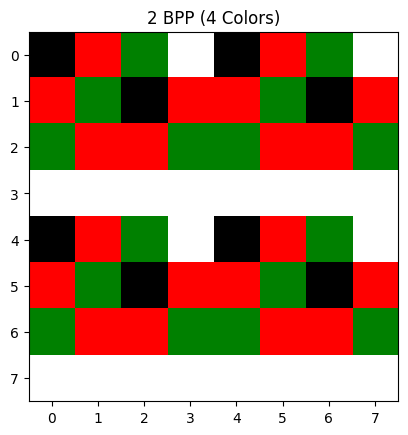


2 BPP Image Data:
Each row requires 2 bytes (16 bits)
Pixels packed as pairs of bits: [P0P1][P2P3][P4P5][P6P7] in each byte
Total size: 16 bytes for 8x8 image


In [3]:
#2 BPP (2-bit per pixel) - 4 colors










import numpy as np
import matplotlib.pyplot as plt

# 2 BPP - Each pixel can be 0-3 (4 colors)
# For 8x8 image, we need 16 bytes (2 bytes per row)

# Example 8x8 image data (4-color pattern)
image_2bpp = [
    0b00011011, 0b00011011,  # Row 0
    0b01100001, 0b01100001,  # Row 1
    0b10010110, 0b10010110,  # Row 2
    0b11111111, 0b11111111,  # Row 3
    0b00011011, 0b00011011,  # Row 4
    0b01100001, 0b01100001,  # Row 5
    0b10010110, 0b10010110,  # Row 6
    0b11111111, 0b11111111   # Row 7
]

# Convert to 8x8 numpy array
pixels = np.zeros((8, 8), dtype=np.uint8)
for y in range(8):
    byte1 = image_2bpp[y*2]
    byte2 = image_2bpp[y*2+1]
    for x in range(8):
        if x < 4:
            pixels[y, x] = (byte1 >> (6 - x*2)) & 0b11
        else:
            pixels[y, x] = (byte2 >> (6 - (x-4)*2)) & 0b11

# Display with custom colormap
colors = ['black', 'red', 'green', 'white']
cmap = plt.matplotlib.colors.ListedColormap(colors)
plt.imshow(pixels, cmap=cmap, vmin=0, vmax=3)
plt.title("2 BPP (4 Colors)")
plt.show()

# Analysis
print("\n2 BPP Image Data:")
print("Each row requires 2 bytes (16 bits)")
print("Pixels packed as pairs of bits: [P0P1][P2P3][P4P5][P6P7] in each byte")
print(f"Total size: {len(image_2bpp)} bytes for 8x8 image")






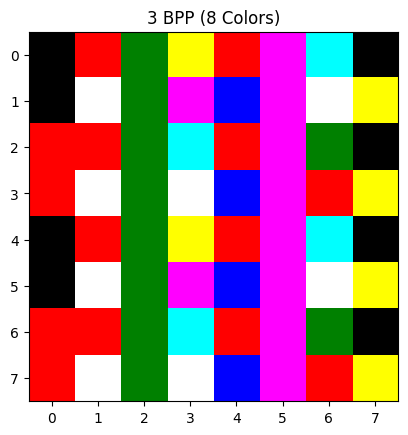


3 BPP Image Data:
Each row requires 3 bytes (24 bits)
Pixels packed as 3-bit values spanning byte boundaries
Total size: 24 bytes for 8x8 image


In [4]:
#3 BPP (3-bit per pixel) - 8 colors








import numpy as np
import matplotlib.pyplot as plt

# 3 BPP - Each pixel can be 0-7 (8 colors)
# For 8x8 image, we need 24 bytes (3 bytes per row)

# Example 8x8 image data (8-color pattern)
image_3bpp = [
    0b00000101, 0b01000011, 0b01110000,  # Row 0
    0b00011101, 0b01010111, 0b01111100,  # Row 1
    0b00100101, 0b01100011, 0b01010000,  # Row 2
    0b00111101, 0b01110111, 0b01001100,  # Row 3
    0b00000101, 0b01000011, 0b01110000,  # Row 4
    0b00011101, 0b01010111, 0b01111100,  # Row 5
    0b00100101, 0b01100011, 0b01010000,  # Row 6
    0b00111101, 0b01110111, 0b01001100   # Row 7
]

# Convert to 8x8 numpy array
pixels = np.zeros((8, 8), dtype=np.uint8)
for y in range(8):
    byte1 = image_3bpp[y*3]
    byte2 = image_3bpp[y*3+1]
    byte3 = image_3bpp[y*3+2]
    for x in range(8):
        if x == 0:
            pixels[y, x] = (byte1 >> 5) & 0b111
        elif x == 1:
            pixels[y, x] = ((byte1 & 0b00011100) >> 2)
        elif x == 2:
            pixels[y, x] = ((byte1 & 0b00000011) << 1) | ((byte2 & 0b10000000) >> 7)
        elif x == 3:
            pixels[y, x] = (byte2 >> 4) & 0b111
        elif x == 4:
            pixels[y, x] = ((byte2 & 0b00001110) >> 1)
        elif x == 5:
            pixels[y, x] = ((byte2 & 0b00000001) << 2) | ((byte3 & 0b11000000) >> 6)
        elif x == 6:
            pixels[y, x] = (byte3 >> 3) & 0b111
        elif x == 7:
            pixels[y, x] = byte3 & 0b111

# Display with custom colormap
colors = ['black', 'red', 'green', 'blue', 'yellow', 'magenta', 'cyan', 'white']
cmap = plt.matplotlib.colors.ListedColormap(colors)
plt.imshow(pixels, cmap=cmap, vmin=0, vmax=7)
plt.title("3 BPP (8 Colors)")
plt.show()

# Analysis
print("\n3 BPP Image Data:")
print("Each row requires 3 bytes (24 bits)")
print("Pixels packed as 3-bit values spanning byte boundaries")
print(f"Total size: {len(image_3bpp)} bytes for 8x8 image")














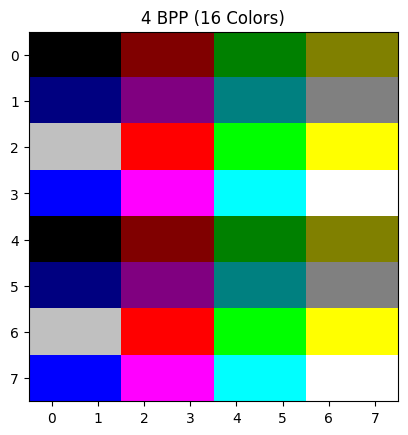


4 BPP Image Data:
Each byte contains two pixels (high and low nibble)
Total size: 32 bytes for 8x8 image


In [5]:
#4 BPP (4-bit per pixel) - 16 colors







import numpy as np
import matplotlib.pyplot as plt

# 4 BPP - Each pixel can be 0-15 (16 colors)
# For 8x8 image, we need 32 bytes (4 bytes per row)

# Example 8x8 image data (16-color gradient)
image_4bpp = [
    0x00, 0x11, 0x22, 0x33,  # Row 0
    0x44, 0x55, 0x66, 0x77,  # Row 1
    0x88, 0x99, 0xAA, 0xBB,  # Row 2
    0xCC, 0xDD, 0xEE, 0xFF,  # Row 3
    0x00, 0x11, 0x22, 0x33,  # Row 4
    0x44, 0x55, 0x66, 0x77,  # Row 5
    0x88, 0x99, 0xAA, 0xBB,  # Row 6
    0xCC, 0xDD, 0xEE, 0xFF   # Row 7
]

# Convert to 8x8 numpy array
pixels = np.zeros((8, 8), dtype=np.uint8)
for y in range(8):
    for x in range(8):
        byte_idx = y * 4 + x // 2
        if x % 2 == 0:  # Even pixels (high nibble)
            pixels[y, x] = (image_4bpp[byte_idx] >> 4) & 0xF
        else:           # Odd pixels (low nibble)
            pixels[y, x] = image_4bpp[byte_idx] & 0xF

# Display with custom colormap
colors = ['#000000', '#800000', '#008000', '#808000',
          '#000080', '#800080', '#008080', '#808080',
          '#C0C0C0', '#FF0000', '#00FF00', '#FFFF00',
          '#0000FF', '#FF00FF', '#00FFFF', '#FFFFFF']
cmap = plt.matplotlib.colors.ListedColormap(colors)
plt.imshow(pixels, cmap=cmap, vmin=0, vmax=15)
plt.title("4 BPP (16 Colors)")
plt.show()

# Analysis
print("\n4 BPP Image Data:")
print("Each byte contains two pixels (high and low nibble)")
print(f"Total size: {len(image_4bpp)} bytes for 8x8 image")














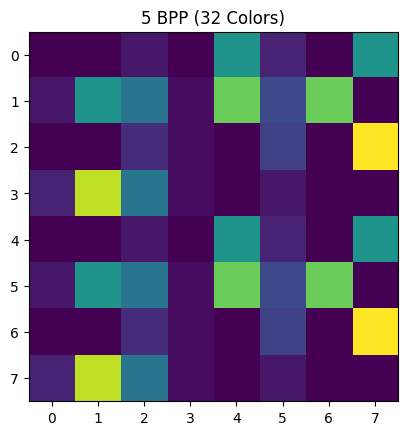


5 BPP Image Data:
Each row requires 5 bytes (40 bits)
Pixels packed as 5-bit values spanning byte boundaries
Total size: 40 bytes for 8x8 image


In [6]:
#5 BPP (5-bit per pixel) - 32 colors










import numpy as np
import matplotlib.pyplot as plt

# 5 BPP - Each pixel can be 0-31 (32 colors)
# For 8x8 image, we need 40 bytes (5 bytes per row)

# Example 8x8 image data (32-color gradient)
image_5bpp = [
    0x00, 0x04, 0x08, 0x0C, 0x10,  # Row 0
    0x14, 0x18, 0x1C, 0x1F, 0x00,  # Row 1
    0x00, 0x08, 0x10, 0x18, 0x1F,  # Row 2
    0x1F, 0x18, 0x10, 0x08, 0x00,  # Row 3
    0x00, 0x04, 0x08, 0x0C, 0x10,  # Row 4
    0x14, 0x18, 0x1C, 0x1F, 0x00,  # Row 5
    0x00, 0x08, 0x10, 0x18, 0x1F,  # Row 6
    0x1F, 0x18, 0x10, 0x08, 0x00   # Row 7
]

# Convert to 8x8 numpy array
pixels = np.zeros((8, 8), dtype=np.uint8)
for y in range(8):
    for x in range(8):
        byte_idx = y * 5 + (x * 5) // 8
        bit_offset = (x * 5) % 8

        if bit_offset <= 3:  # Fits within single byte
            pixels[y, x] = (image_5bpp[byte_idx] >> (3 - bit_offset)) & 0x1F
        else:  # Spans two bytes
            val = ((image_5bpp[byte_idx] << (bit_offset - 3)) |
                   (image_5bpp[byte_idx + 1] >> (11 - bit_offset))) & 0x1F
            pixels[y, x] = val

# Display with custom colormap (simplified)
plt.imshow(pixels, cmap='viridis', vmin=0, vmax=31)
plt.title("5 BPP (32 Colors)")
plt.show()

# Analysis
print("\n5 BPP Image Data:")
print("Each row requires 5 bytes (40 bits)")
print("Pixels packed as 5-bit values spanning byte boundaries")
print(f"Total size: {len(image_5bpp)} bytes for 8x8 image")









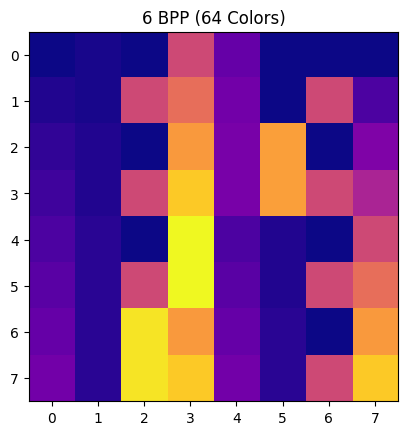


6 BPP Image Data:
Each row requires 6 bytes (48 bits)
Pixels packed as 6-bit values spanning byte boundaries
Total size: 48 bytes for 8x8 image


In [7]:
#6 BPP (6-bit per pixel) - 64 colors








import numpy as np
import matplotlib.pyplot as plt

# 6 BPP - Each pixel can be 0-63 (64 colors)
# For 8x8 image, we need 48 bytes (6 bytes per row)

# Example 8x8 image data (64-color gradient)
image_6bpp = [
    0x00, 0x10, 0x20, 0x30, 0x00, 0x00,  # Row 0
    0x08, 0x18, 0x28, 0x38, 0x08, 0x08,  # Row 1
    0x10, 0x20, 0x30, 0x3F, 0x10, 0x10,  # Row 2
    0x18, 0x28, 0x38, 0x3F, 0x18, 0x18,  # Row 3
    0x20, 0x30, 0x3F, 0x20, 0x20, 0x20,  # Row 4
    0x28, 0x38, 0x3F, 0x28, 0x28, 0x28,  # Row 5
    0x30, 0x3F, 0x30, 0x30, 0x30, 0x30,  # Row 6
    0x38, 0x3F, 0x38, 0x38, 0x38, 0x38   # Row 7
]

# Convert to 8x8 numpy array
pixels = np.zeros((8, 8), dtype=np.uint8)
for y in range(8):
    for x in range(8):
        byte_idx = y * 6 + (x * 6) // 8
        bit_offset = (x * 6) % 8

        if bit_offset <= 2:  # Fits within single byte
            pixels[y, x] = (image_6bpp[byte_idx] >> (2 - bit_offset)) & 0x3F
        else:  # Spans two bytes
            val = ((image_6bpp[byte_idx] << (bit_offset - 2)) |
                   (image_6bpp[byte_idx + 1] >> (10 - bit_offset))) & 0x3F
            pixels[y, x] = val

# Display with custom colormap
plt.imshow(pixels, cmap='plasma', vmin=0, vmax=63)
plt.title("6 BPP (64 Colors)")
plt.show()

# Analysis
print("\n6 BPP Image Data:")
print("Each row requires 6 bytes (48 bits)")
print("Pixels packed as 6-bit values spanning byte boundaries")
print(f"Total size: {len(image_6bpp)} bytes for 8x8 image")













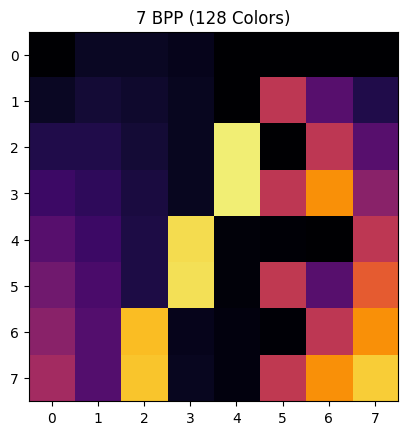


7 BPP Image Data:
Each row requires 7 bytes (56 bits)
Pixels packed as 7-bit values spanning byte boundaries
Total size: 56 bytes for 8x8 image


In [8]:
#7 BPP (7-bit per pixel) - 128 colors








import numpy as np
import matplotlib.pyplot as plt

# 7 BPP - Each pixel can be 0-127 (128 colors)
# For 8x8 image, we need 56 bytes (7 bytes per row)

# Example 8x8 image data (128-color gradient)
image_7bpp = [
    0x00, 0x20, 0x40, 0x60, 0x00, 0x00, 0x00,  # Row 0
    0x10, 0x30, 0x50, 0x70, 0x10, 0x10, 0x10,  # Row 1
    0x20, 0x40, 0x60, 0x7F, 0x20, 0x20, 0x20,  # Row 2
    0x30, 0x50, 0x70, 0x7F, 0x30, 0x30, 0x30,  # Row 3
    0x40, 0x60, 0x7F, 0x40, 0x40, 0x40, 0x40,  # Row 4
    0x50, 0x70, 0x7F, 0x50, 0x50, 0x50, 0x50,  # Row 5
    0x60, 0x7F, 0x60, 0x60, 0x60, 0x60, 0x60,  # Row 6
    0x70, 0x7F, 0x70, 0x70, 0x70, 0x70, 0x70   # Row 7
]

# Convert to 8x8 numpy array
pixels = np.zeros((8, 8), dtype=np.uint8)
for y in range(8):
    for x in range(8):
        byte_idx = y * 7 + (x * 7) // 8
        bit_offset = (x * 7) % 8

        if bit_offset <= 1:  # Fits within single byte
            pixels[y, x] = (image_7bpp[byte_idx] >> (1 - bit_offset)) & 0x7F
        else:  # Spans two bytes
            val = ((image_7bpp[byte_idx] << (bit_offset - 1)) |
                   (image_7bpp[byte_idx + 1] >> (9 - bit_offset))) & 0x7F
            pixels[y, x] = val

# Display with custom colormap
plt.imshow(pixels, cmap='inferno', vmin=0, vmax=127)
plt.title("7 BPP (128 Colors)")
plt.show()

# Analysis
print("\n7 BPP Image Data:")
print("Each row requires 7 bytes (56 bits)")
print("Pixels packed as 7-bit values spanning byte boundaries")
print(f"Total size: {len(image_7bpp)} bytes for 8x8 image")








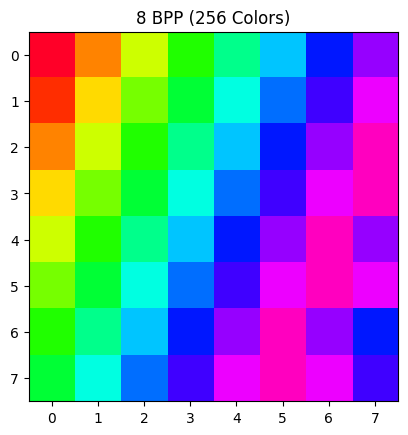


8 BPP Image Data:
Each pixel is exactly one byte
Simplest format - direct 1:1 mapping
Total size: 64 bytes for 8x8 image


In [9]:
# 8 BPP (8-bit per pixel) - 256 colors




import numpy as np
import matplotlib.pyplot as plt

# 8 BPP - Each pixel can be 0-255 (256 colors)
# For 8x8 image, we need 64 bytes (8 bytes per row)

# Example 8x8 image data (256-color gradient)
image_8bpp = [
    0x00, 0x20, 0x40, 0x60, 0x80, 0xA0, 0xC0, 0xE0,  # Row 0
    0x10, 0x30, 0x50, 0x70, 0x90, 0xB0, 0xD0, 0xF0,  # Row 1
    0x20, 0x40, 0x60, 0x80, 0xA0, 0xC0, 0xE0, 0xFF,  # Row 2
    0x30, 0x50, 0x70, 0x90, 0xB0, 0xD0, 0xF0, 0xFF,  # Row 3
    0x40, 0x60, 0x80, 0xA0, 0xC0, 0xE0, 0xFF, 0xE0,  # Row 4
    0x50, 0x70, 0x90, 0xB0, 0xD0, 0xF0, 0xFF, 0xF0,  # Row 5
    0x60, 0x80, 0xA0, 0xC0, 0xE0, 0xFF, 0xE0, 0xC0,  # Row 6
    0x70, 0x90, 0xB0, 0xD0, 0xF0, 0xFF, 0xF0, 0xD0   # Row 7
]

# Convert to 8x8 numpy array
pixels = np.array(image_8bpp, dtype=np.uint8).reshape((8, 8))

# Display with custom colormap
plt.imshow(pixels, cmap='gist_rainbow', vmin=0, vmax=255)
plt.title("8 BPP (256 Colors)")
plt.show()

# Analysis
print("\n8 BPP Image Data:")
print("Each pixel is exactly one byte")
print("Simplest format - direct 1:1 mapping")
print(f"Total size: {len(image_8bpp)} bytes for 8x8 image")









---



---



---



---



---



---



---



---



---



---



---



---



---



---



---



---



---



---



---



---



---



---



---



---



---



---



---



---



---



---



# **Color Range Visualization:**

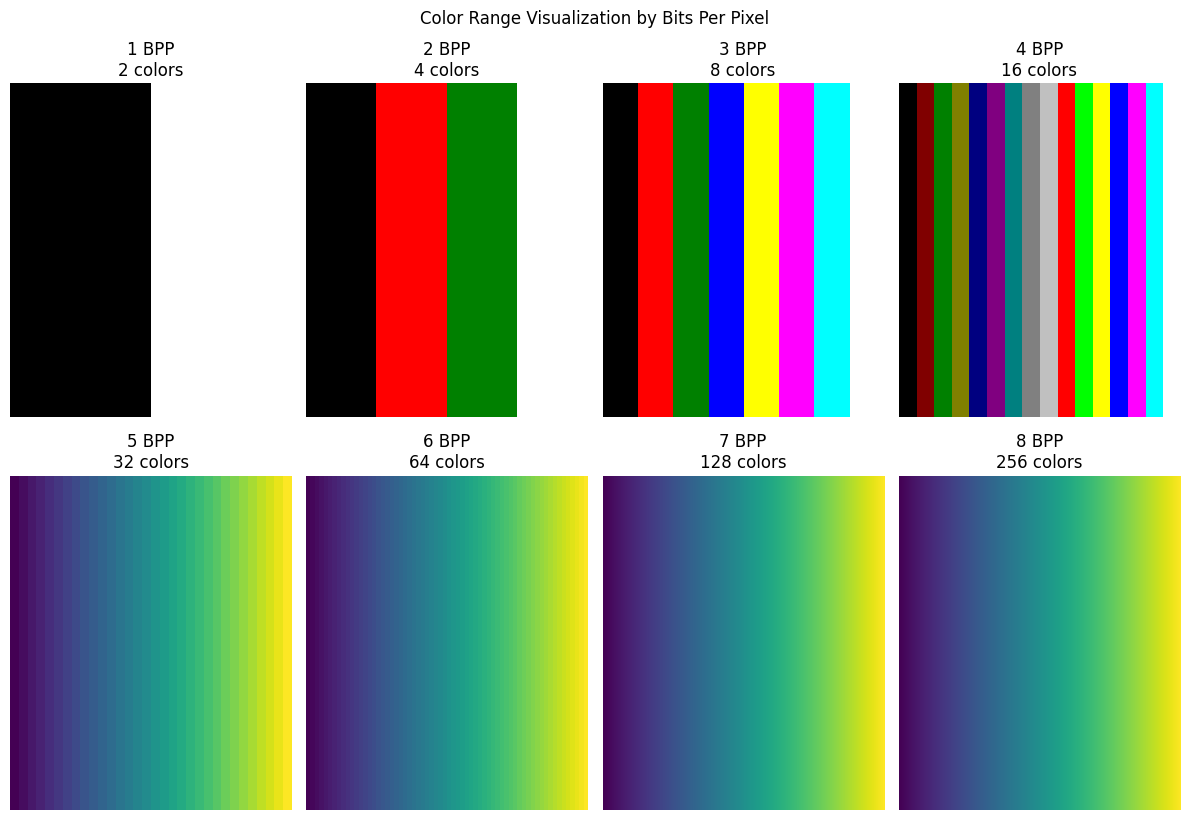

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.figure(figsize=(12, 8))

for bpp in range(1, 9):
    # Calculate number of colors for this bpp
    num_colors = 2 ** bpp

    # Create a gradient from black to white with num_colors steps
    gradient = np.linspace(0, 1, num_colors)

    # Create a colormap for visualization
    if bpp <= 4:
        # For low bpp, use distinct colors
        if bpp == 1:
            colors = ['black', 'white']
        elif bpp == 2:
            colors = ['black', 'red', 'green', 'white']
        elif bpp == 3:
            colors = ['black', 'red', 'green', 'blue',
                     'yellow', 'magenta', 'cyan', 'white']
        elif bpp == 4:
            colors = ['#000000', '#800000', '#008000', '#808000',
                     '#000080', '#800080', '#008080', '#808080',
                     '#C0C0C0', '#FF0000', '#00FF00', '#FFFF00',
                     '#0000FF', '#FF00FF', '#00FFFF', '#FFFFFF']
        cmap = ListedColormap(colors)
    else:
        # For higher bpp, use continuous colormap
        cmap = 'viridis'

    # Create image data - just a horizontal gradient
    img_data = np.tile(gradient, (50, 1))

    # Plot
    plt.subplot(2, 4, bpp)
    plt.imshow(img_data, cmap=cmap, aspect='auto')
    plt.title(f"{bpp} BPP\n{num_colors} colors")
    plt.axis('off')

plt.tight_layout()
plt.suptitle("Color Range Visualization by Bits Per Pixel", y=1.02)
plt.show()






**Color Range Visualization:**

* Each subplot shows the available colors for a specific bpp value

* For 1-4 bpp: Uses distinct, easily distinguishable colors

* For 5-8 bpp: Shows smooth gradients as the number of colors becomes too large for distinct display

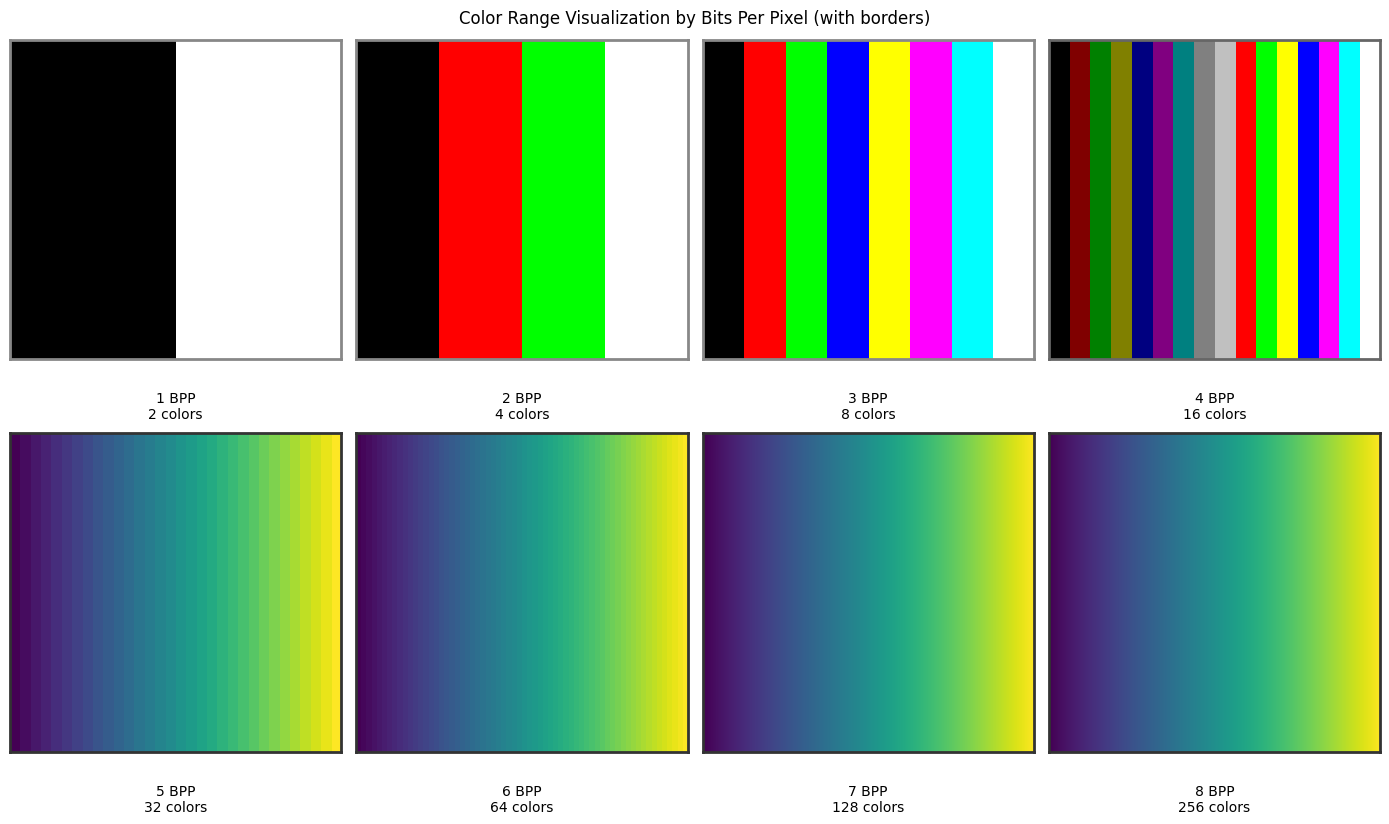

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Rectangle

plt.figure(figsize=(14, 8))

for bpp in range(1, 9):
    # Calculate number of colors for this bpp
    num_colors = 2 ** bpp

    # Create color data
    gradient = np.linspace(0, 1, num_colors)
    img_data = np.tile(gradient, (50, 1))

    # Create colormaps
    if bpp <= 4:
        if bpp == 1:
            colors = ['#000000', '#FFFFFF']  # Black and white
            edge_color = '#888888'  # Gray border for visibility
        elif bpp == 2:
            colors = ['#000000', '#FF0000', '#00FF00', '#FFFFFF']
            edge_color = '#888888'
        elif bpp == 3:
            colors = ['#000000', '#FF0000', '#00FF00', '#0000FF',
                     '#FFFF00', '#FF00FF', '#00FFFF', '#FFFFFF']
            edge_color = '#888888'
        elif bpp == 4:
            colors = ['#000000', '#800000', '#008000', '#808000',
                     '#000080', '#800080', '#008080', '#808080',
                     '#C0C0C0', '#FF0000', '#00FF00', '#FFFF00',
                     '#0000FF', '#FF00FF', '#00FFFF', '#FFFFFF']
            edge_color = '#666666'
        cmap = ListedColormap(colors)
    else:
        cmap = 'viridis'
        edge_color = '#333333'

    # Create subplot with border
    ax = plt.subplot(2, 4, bpp)

    # Display the gradient
    img = ax.imshow(img_data, cmap=cmap, aspect='auto')

    # Add border around the color bar
    for spine in ax.spines.values():
        spine.set_color(edge_color)
        spine.set_linewidth(2)

    # Add title inside the plot area
    ax.text(0.5, -0.1, f"{bpp} BPP\n{num_colors} colors",
            transform=ax.transAxes,
            ha='center', va='top')

    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.suptitle("Color Range Visualization by Bits Per Pixel (with borders)", y=1.02)
plt.show()













# **High Bit-Depth Representation:**

* 12bpp: 4,096 colors

* 16bpp: 65,536 colors (High Color)

* 24bpp: 16.7 million colors (True Color)

* 30/32bpp: 1 billion+ colors (Deep Color)

* 48/64bpp: 281 trillion/18 quintillion colors (Used in HDR/float imaging)

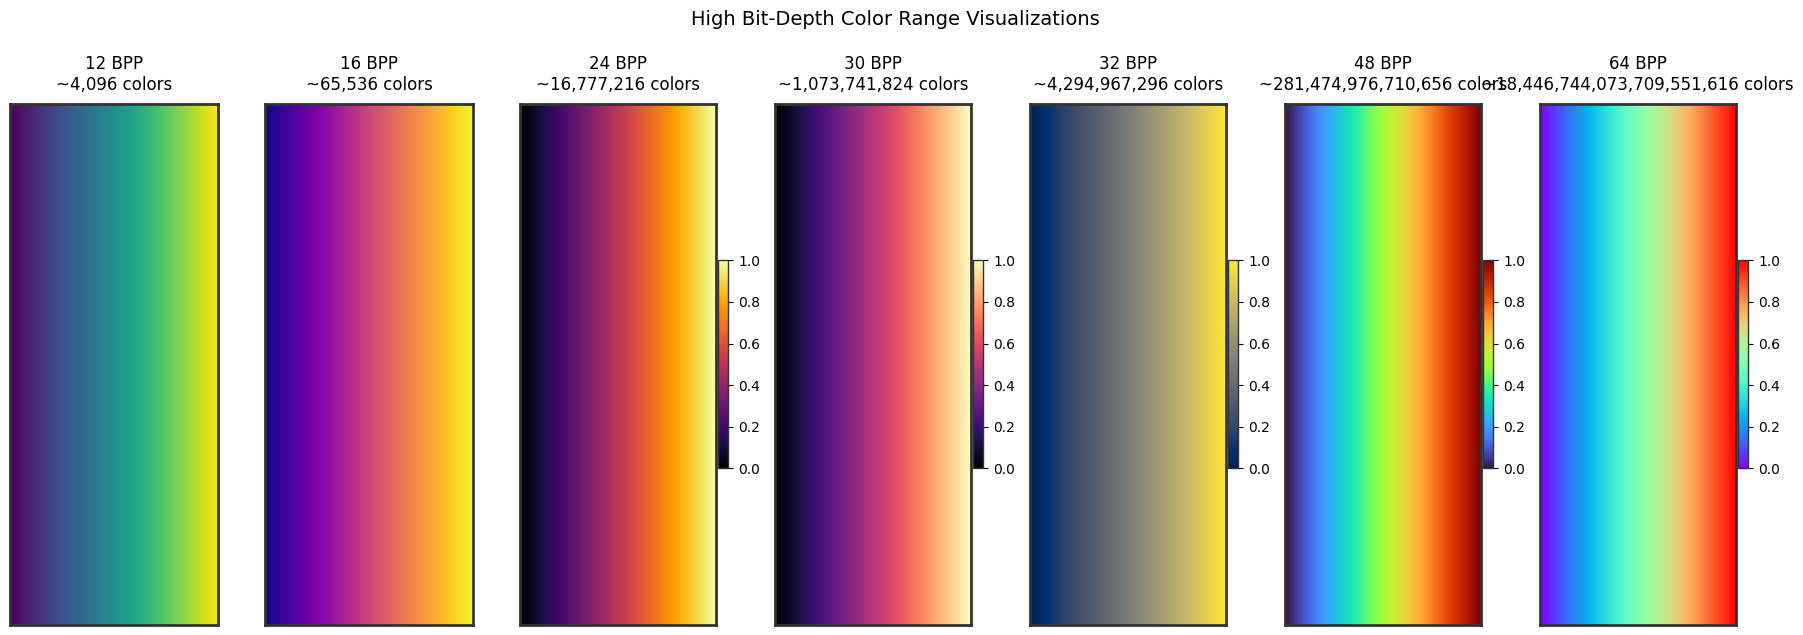

In [13]:





import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Set up the figure
plt.figure(figsize=(18, 6))
bpp_values = [12, 16, 24, 30, 32, 48, 64]
colormaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'turbo', 'rainbow']

for i, bpp in enumerate(bpp_values):
    # Calculate theoretical number of colors (though we can't display them all)
    num_colors = 2 ** bpp

    # Create gradient - we'll sample a representative subset
    samples = 256  # Number of color samples to show
    gradient = np.linspace(0, 1, samples)
    img_data = np.tile(gradient, (40, 1))

    # Create subplot with border
    ax = plt.subplot(1, len(bpp_values), i+1)

    # Use different colormaps for variety
    img = ax.imshow(img_data, cmap=colormaps[i], aspect='auto')

    # Add border
    for spine in ax.spines.values():
        spine.set_color('#333333')
        spine.set_linewidth(2)

    # Add title and info
    ax.set_title(f"{bpp} BPP\n~{num_colors:,} colors", pad=10)
    ax.set_xticks([])
    ax.set_yticks([])

    # Add colorbar for reference
    if bpp >= 24:  # Only show for high bit depths
        cbar = plt.colorbar(img, ax=ax, fraction=0.05, pad=0.01)
        cbar.outline.set_edgecolor('#333333')
        cbar.outline.set_linewidth(1)

plt.tight_layout()
plt.suptitle("High Bit-Depth Color Range Visualizations", y=1.05, fontsize=14)
plt.show()











